In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import os 
import netCDF4 as nc
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1) Data Visualization

### Import raw data (export and import volumes)

In [2]:

rawData = pd.read_csv("./tradeData.csv") 
rawData

,domain,domainCode,areaCode,area,elementCode,element,itemCode,item,yearCode,year,unit,value,flag,flagDesc
0,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,112,Maize (corn),1961,1961,tonnes,NaN,NaN,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,112,Maize (corn),1962,1962,tonnes,NaN,NaN,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,112,Maize (corn),1963,1963,tonnes,NaN,NaN,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,112,Maize (corn),1964,1964,tonnes,NaN,NaN,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5610,Import Quantity,112,Maize (corn),1965,1965,tonnes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111818,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,111,Wheat,2016,2016,1000 US$,NaN,NaN,NaN
111819,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,111,Wheat,2017,2017,1000 US$,5280.0,NaN,NaN
111820,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,111,Wheat,2018,2018,1000 US$,10.0,NaN,NaN
111821,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,111,Wheat,2019,2019,1000 US$,255.0,NaN,NaN


# 2) Getting the data in and organized

In [3]:
print("How many years we have: ", len(np.unique(rawData['year'])))
print("How many countries we have: ", len(np.unique(rawData['area'])))
print("Our columns are : ")
for col in rawData.columns:
    print(col)

How many years we have:  60
How many countries we have:  203
Our columns are : 
domain
domainCode
areaCode
area
elementCode
element
itemCode
item
yearCode
year
unit
value
flag
flagDesc


### Visualizations

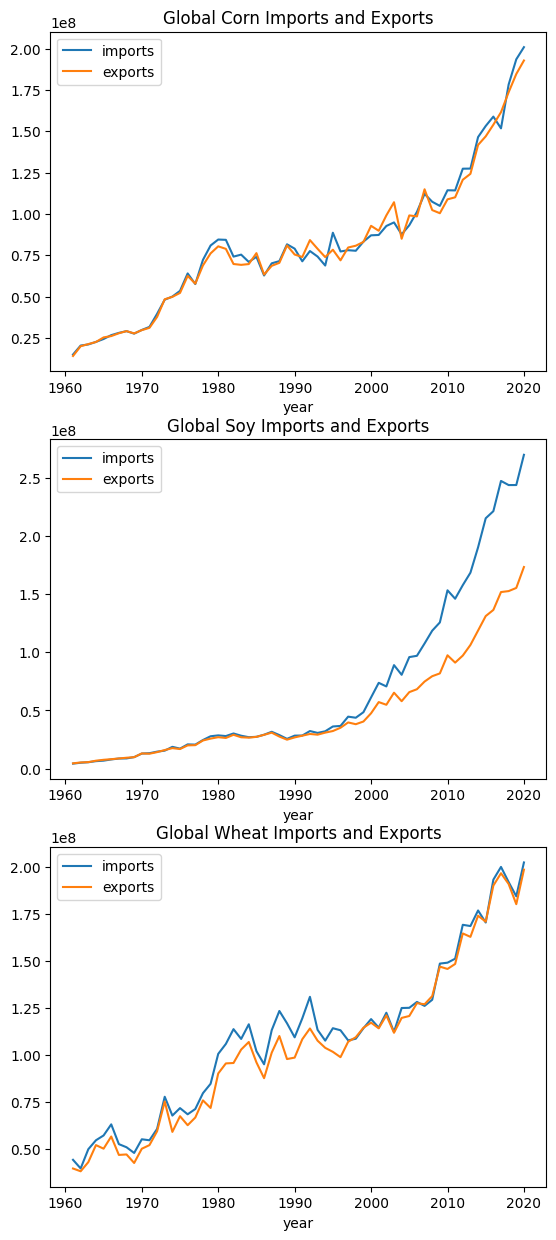

In [42]:
items = {
    'Corn': "Maize (corn)",
    'Soy': "Soya beans",
    'Wheat': "Wheat",
}

importQuantityData = rawData[(rawData["element"] == "Import Quantity")]
exportQuantityData = rawData[(rawData["element"] == "Export Quantity")]

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)

for i, crop in enumerate(items):
    tradeItem = items[crop]

    itemImports = importQuantityData[(importQuantityData["item"] == tradeItem)]
    itemExports = exportQuantityData[(exportQuantityData["item"] == tradeItem)]

    allImport = itemImports.groupby(['year'])['value'].agg('sum')
    allImport.plot(ax=axes[i], legend=True, label="imports")

    allExport = itemExports.groupby(['year'])['value'].agg('sum')
    allExport.plot(ax=axes[i], title="Global " + crop + " Imports and Exports", legend=True, label="exports")


# 2) Price

### Import Price Calculation

In [117]:
IMPORT_VALUE_CODE = 5622
IMPORT_QUANTITY_CODE = 5610

importData = rawData[(rawData["element"] == "Import Value") | (rawData["element"] == "Import Quantity")]
countryImports = importData.groupby(['area', 'item', 'year'])

# create a new dataframe to hold price data
d = {'area': [], 'item': [], 'year': [], 'import_value': [], 'import_quantity': [], 'price': [] }
importPriceRegData = pd.DataFrame(data = d)

# loop over data to calculate import prices
for index, row in countryImports:
    importValueRow = row[(row["elementCode"] == IMPORT_VALUE_CODE)]
    importQuantityRow = row[(row["elementCode"] == IMPORT_QUANTITY_CODE)]

    importValue = importValueRow['value'].values[0]
    importQuantity = importQuantityRow['value'].values[0]

    price = importValue / importQuantity

    # add price calculation to data frame
    importPriceRegData.loc[len(importPriceRegData.index)] = [index[0], index[1], index[2], importValue, importQuantity, price] 

importPriceRegData.to_csv('importPriceData.csv')



### Export Price Calculation

In [121]:
EXPORT_VALUE_CODE = 5922
EXPORT_QUANTITY_CODE = 5910

exportData = rawData[(rawData["element"] == "Export Value") | (rawData["element"] == "Export Quantity")]
countryExports = exportData.groupby(['area', 'item', 'year'])

# create a new dataframe to hold price data
d = {'area': [], 'item': [], 'year': [], 'export_value': [], 'export_quantity': [], 'price': [] }
exportPriceRegData = pd.DataFrame(data = d)

# loop over data to calculate export prices
for index, row in countryExports:
    exportValueRow = row[(row["elementCode"] == EXPORT_VALUE_CODE)]
    exportQuantityRow = row[(row["elementCode"] == EXPORT_QUANTITY_CODE)]

    exportValue = 0
    if not exportValueRow.empty:
        exportValue = exportValueRow['value'].values[0]
    
    exportQuantity = float("nan")
    if not exportQuantityRow.empty:
        exportQuantity = exportQuantityRow['value'].values[0]

    price = exportValue / exportQuantity

    # add price calculation to data frame
    exportPriceRegData.loc[len(exportPriceRegData.index)] = [index[0], index[1], index[2], exportValue, exportQuantity, price] 

exportPriceRegData.to_csv('exportPriceData.csv')

